## Data are ready to be studied

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import pyarrow as pa 


In [5]:
#Loading of the dataset for the study
DfLabelledTimeSeriesCleaned=pd.read_parquet('F:\Data_BachelorHES/5.Dataset_preparation/CNC_Labelled_Data_Cleaned.parquet', engine='pyarrow')

In [6]:
DfLabelledTimeSeriesCleaned.describe()

,frame,frame_time_ms,frame_duration_ms,Data_points,Op_Nb
count,55117.000000,5.511700e+04,55117.000000,55117.000000,55117.000000
mean,147755.000000,4.926291e+06,166.702248,8335.112397,351041.149010
std,79555.258652,2.652447e+06,0.710134,35.506719,231852.309527
min,9965.000000,3.322456e+05,33.340000,1667.000000,3380.000000
25%,78860.000000,2.629278e+06,166.700000,8335.000000,219610.000000
50%,147755.000000,4.926276e+06,166.700000,8335.000000,233600.000000
75%,216650.000000,7.223308e+06,166.720000,8336.000000,593130.000000
max,285545.000000,9.520340e+06,200.040000,10002.000000,765000.000000


In [8]:
progLineCount=DfLabelledTimeSeriesCleaned['Label_Program_Line'].value_counts()
opNameCount=DfLabelledTimeSeriesCleaned['Label_Op_Name'].value_counts()
toolNameCount=DfLabelledTimeSeriesCleaned['Label_Tool_Name'].value_counts()
print(f'Number of program lines represented: {len(progLineCount)}, on : {np.sum(progLineCount)} observations \n10 biggest program lines : \n {progLineCount[:10]}')

Number of program lines represented: 9660, on : 55117 observations 
10 biggest program lines : 
 Label_Program_Line
N236840 G01 G40 X60.994 Y-26.053     349
N240060 G00 Z10.                     347
N243470 G00 Z10.                     347
N243270 G00 Z10.                     347
N237050 G00 Z10.                     347
N230630 G00 Z10.                     346
N233830 G01 G40 X-165.047 Y26.053    346
N227420 G00 Z10.                     345
N227090 X53.969 Y-25.5 I13.005 J0    247
N217250 G90 M01                      225
Name: count, dtype: int64


In [9]:
print(f'Number of operations represented: {len(opNameCount)}, on : {np.sum(opNameCount)} observations \n10 first Operations  : \n {opNameCount[:10]}')

Number of operations represented: 114, on : 55117 observations 
10 first Operations  : 
 Label_Op_Name
(FIN 26H7)                 6252
(FIN 25H8)                 4274
(FIN CHAMBRAGE D10)        2499
(EB + FIN RAINURE R2 B)    2433
(EB + FIN RAINURE R2 A)    2403
(PERCAGE M4 A)             2222
(PERCAGE M6)               1734
(PERCAGE M4 B)             1724
(EB CHAMBRAGE D10)         1603
(PERCAGE M4 E)             1565
Name: count, dtype: int64


In [10]:
print(f'Number of tools represented: {len(toolNameCount)}, on : {np.sum(toolNameCount)} observations \n10 biggest program lines : \n {toolNameCount[:10]}')

Number of tools represented: 13, on : 55117 observations 
10 biggest program lines : 
 Label_Tool_Name
T02 M06 (VHM 309-12)       21917
T03 M06 (VHM 309-6)         7134
T08 M06 (MECHE3.7 MD)       6710
T06 M06 (VHM 309-3)         6506
T23 M06 (CHANF8)            5243
T09 M06 (MECHE4.6 MD)       1979
T10 M06 (MECHE5.5 MD)       1722
T24 M06 (FRSURF50X5)        1355
T14 M06 (MECHE5.3)          1321
T19 M06 (MECHE MD D4.8)      485
Name: count, dtype: int64


In [11]:
for idx_num, (idx_text, valeur) in enumerate(progLineCount.items()):
    if valeur<30:
        print(idx_num, idx_text, valeur)
        break

333 N223770 G98 G83 Z-17.056 R2. Q2. F1670. 29


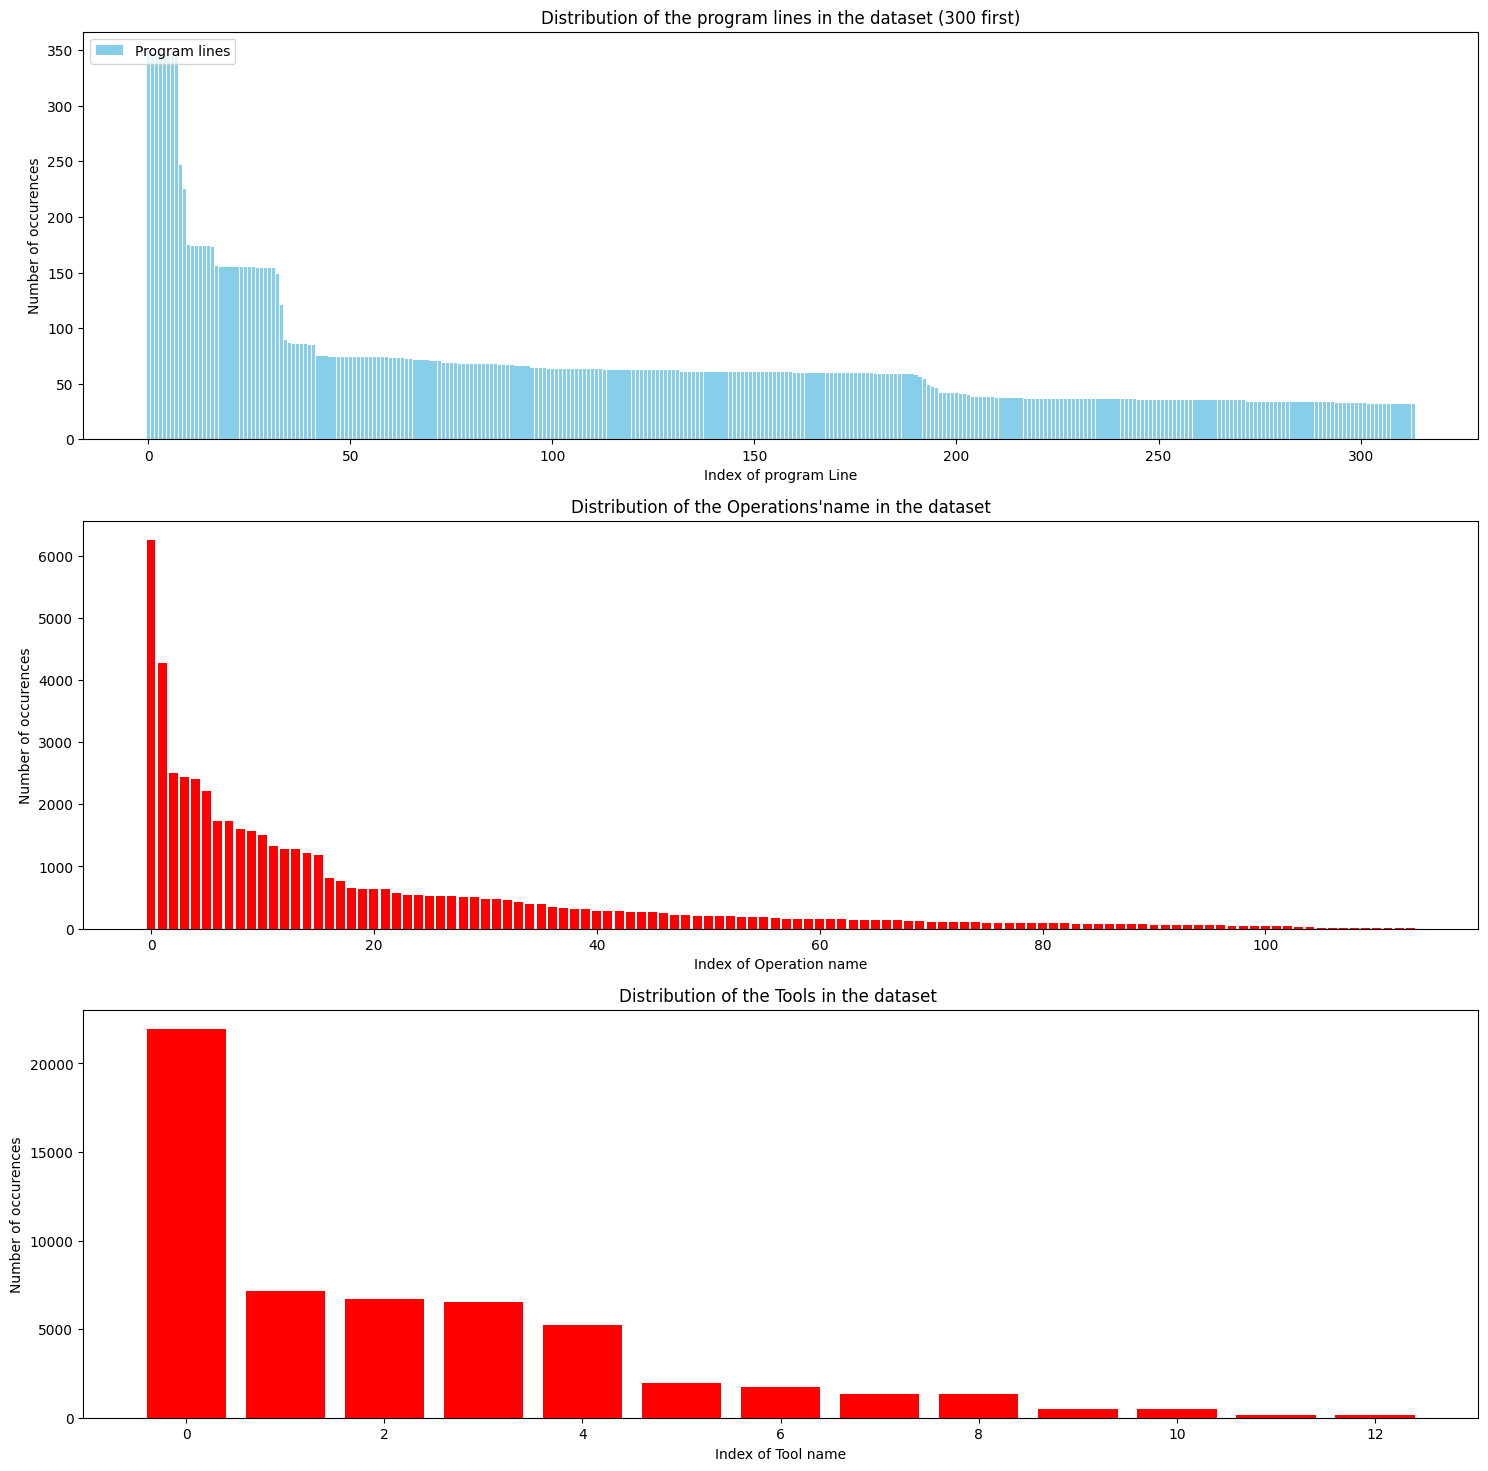

In [12]:

plt.figure(figsize=(18,18))
plt.subplot(3,1,1)
x=np.arange(len(progLineCount[:314]))
plt.bar(x, progLineCount[:314], label="Program lines", color="skyblue", edgecolor=None)
plt.title("Distribution of the program lines in the dataset (300 first)")
plt.xlabel('Index of program Line')
plt.ylabel('Number of occurences')
plt.legend(loc='upper left')

plt.subplot(3,1,2)
x=np.arange(len(opNameCount))
plt.bar(x, opNameCount, label="Smoothed Values", color='red')
plt.title("Distribution of the Operations'name in the dataset")
plt.xlabel('Index of Operation name')
plt.ylabel('Number of occurences')

plt.subplot(3,1,3)
x=np.arange(len(toolNameCount))
plt.bar(x, toolNameCount, label="Smoothed Values", color='red')
plt.title("Distribution of the Tools in the dataset ")
plt.xlabel('Index of Tool name')
plt.ylabel('Number of occurences')
plt.show()



del x

## Distribution of the labels
Tools : During the measurements 13 tools were used. We can see that tool T02 is the most used tool in the dataset. We will then have a "bias" toward that tool.
Operations : The dataset contains 114 different operations. The most used operation is "FIN 26H7".
Program lines : The dataset contains 9937 different program lines (Classes). The most used program line is "N230500 X-158.021 Y25.5 I-13.005 J0".
We can tell that labels of the dataet have an imbalanced distribution. At first, to avoid overfitting of the data, we will take the labels of the tools as the target variable. ProgLine and Operation name will be left aside for the moment.

We now need to prepare the data for the study. We will first split the data into training and testing sets. We will then investigate the distribution of the labels in the training set. In order to split the data, we will investigate the following techniques:
    - Visualize the temporal distribution of the labels
    - Cross-Validation with temporal blocs with each class represented in each fold
    - Stratified Cross-Validation on time series
    

Since labels of the dataset are imbalanced, we will investigate the following techniques on the training set :
SMOTE-Tomek, Undersampling, Data augmentation



In [22]:
import matplotlib.pyplot as plt

# Tracer la répartition des classes dans le temps
 # Ajout d'un index temporel si non présent
def rep_classes_Time(labelledTimeSeries, labelName, showLegend=True, obsCount=None):
    if obsCount is not None:
        labelledTimeSeries=labelledTimeSeries[:obsCount]
    y=[]        
    plt.figure(figsize=(12, 6))
    for label in labelledTimeSeries[labelName].unique():
        classData = labelledTimeSeries[labelledTimeSeries[labelName] == label]
        plt.plot(classData['frame_time_ms']/1000, [label] * len(classData), '.', label=f"Class {label}")

    if showLegend:
        plt.legend(loc="lower right")
       
 
    plt.title(f"Repartion of classes {labelName} over time")
    plt.xlabel("Time [s]")
    plt.ylabel("Class")
    plt.show()
    return classData

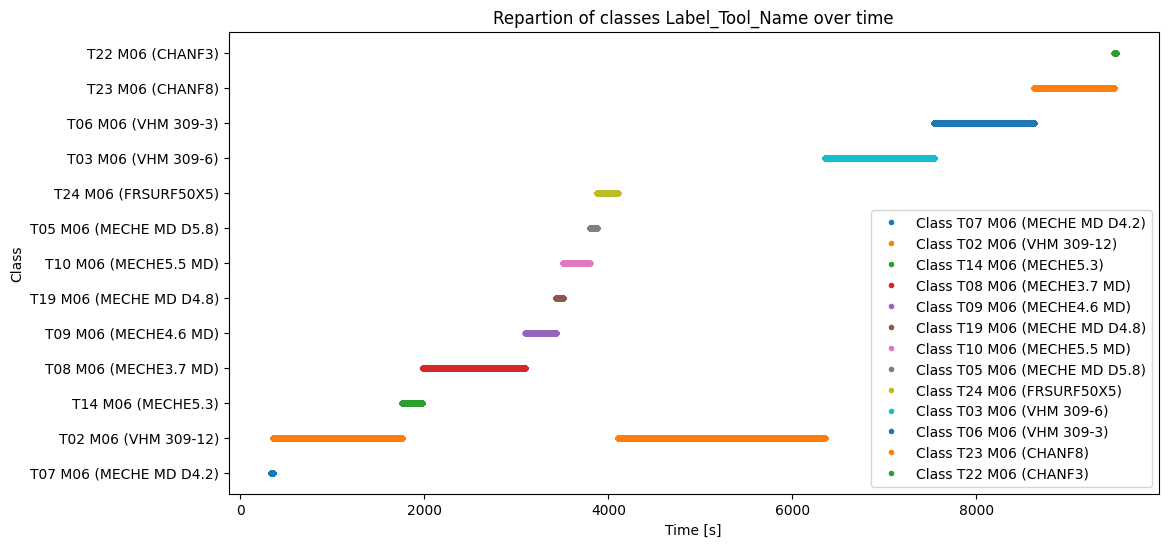

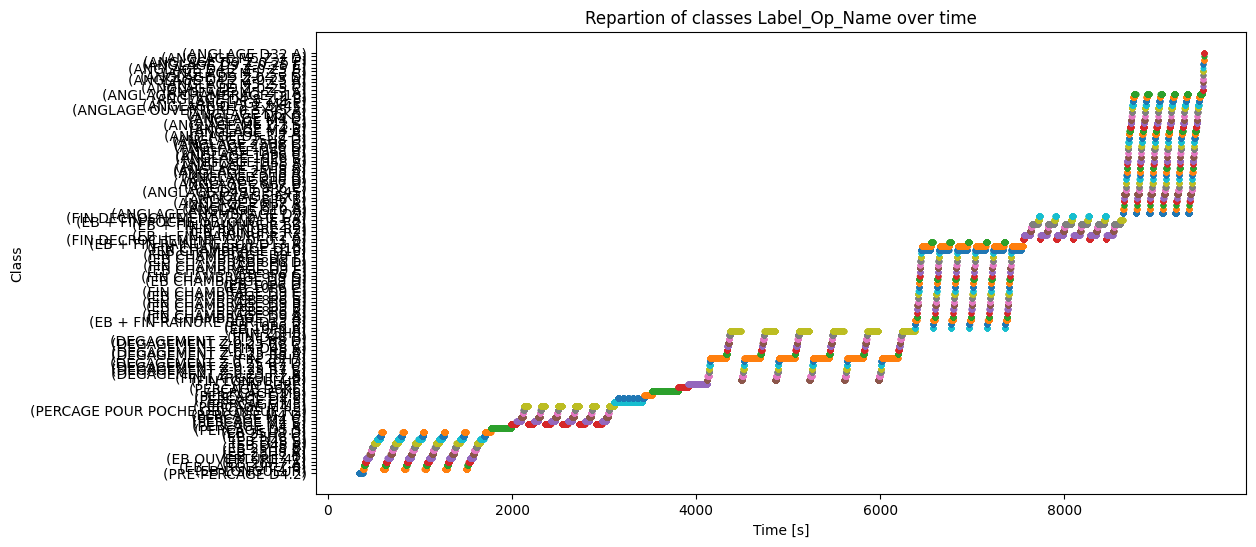

In [24]:
toolsRepart=rep_classes_Time(DfLabelledTimeSeriesCleaned, 'Label_Tool_Name')
operationsRepart=rep_classes_Time(DfLabelledTimeSeriesCleaned, 'Label_Op_Name', showLegend=False)
del toolsRepart, operationsRepart

Based on the repartition of classes over time we will adopt one of the two following strategies:
   - Cross-Validation with temporal blocs with each class represented in each fold: take blocs of time and split them into train and test sets wit first samples as train and last samples as test. Temporality is kept but classes can be imbalanced in each fold.

    - Stratified Cross-Validation on time series: For each class and time separate a portion for train and a portion for test (80/20). Temporality is not kept, classes are balanced in each fold.
    
Before going to the train / test separtion, we will investigate in more details the measurements of : sound, acceleration X, Y and Z. 

## Feature extraction
That is where the problems began and at that part, we decided to cponcatenate hte data into 5s segments -> See Kaggle notebook 

In [1]:
# Fonction pour extraire des caractéristiques d'une sous-fenêtre

from scipy.stats import skew, kurtosis
from scipy.fft import fft
import numpy as np

def extractFeaturesFromFrame(measLst,label=""):
    fs=50000
    fftCoeffs = np.abs(fft(measLst))
    freq= np.fft.fftfreq(len(measLst), d=1/fs)
    maxIdx = np.argmax(fftCoeffs[freq>=0])
    max_amplitude = fftCoeffs[maxIdx]
    dominant_frequency = freq[maxIdx]
    return {
        f'mean_{label}': np.mean(measLst),
        f'std_{label}': np.std(measLst),
        f'min_{label}': np.min(measLst),
        f'max_{label}': np.max(measLst),
        f'energy_{label}': np.sum(np.square(measLst)),
        f'rootMeanSquare_{label}': np.sqrt(np.mean(np.square(measLst))),
        f'skewness_{label}': skew(measLst),
        f'kurtosis_{label}': kurtosis(measLst),
        f'fft_peak_amplitude_{label}': max_amplitude,
        f'fft_peak_frequency_{label}': dominant_frequency
    }

sound='Sound'
accX='Accel X'
accY='Accel Y'
accZ='Accel Z'

In [2]:
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as pa 

DfLabelledTimeSeries=pd.read_parquet('F:/Data_BachelorHES/DataSet_CNC/CNC_Labelled_Data_Cleaned.parquet', engine='pyarrow')

In [34]:
mySndFeatures=DfLabelledTimeSeriesCleaned[sound].apply(lambda x: pd.Series(extractFeaturesFromFrame(x)))

In [35]:
myAccXFeatures=DfLabelledTimeSeriesCleaned[accX].apply(lambda x: pd.Series(extractFeaturesFromFrame(x)))

In [36]:
myAccYFeatures=DfLabelledTimeSeriesCleaned[accY].apply(lambda x: pd.Series(extractFeaturesFromFrame(x)))

In [37]:
myAccZFeatures=DfLabelledTimeSeriesCleaned[accZ].apply(lambda x: pd.Series(extractFeaturesFromFrame(x)))

In [52]:
# Ajouter un suffixe aux colonnes de chaque DataFrame
mySndFeatures = mySndFeatures.add_suffix('_Snd')
myAccXFeatures = myAccXFeatures.add_suffix('_AccX')
myAccYFeatures = myAccYFeatures.add_suffix('_AccY')
myAccZFeatures = myAccZFeatures.add_suffix('_AccZ')

In [41]:
TimeStamps=[]

In [45]:
from itertools import accumulate

TimeStamps=[DfLabelledTimeSeriesCleaned['Data_points'][i-1]/50 for i in range(1, len(DfLabelledTimeSeriesCleaned['Data_points']))]
TimeStamps.insert(0,0)

TimeStamps = list(accumulate(TimeStamps))


In [48]:
TimeStamps=pd.Series(TimeStamps)

In [56]:
myDefinitiveDf=pd.concat([TimeStamps, DfLabelledTimeSeriesCleaned['Sound'],DfLabelledTimeSeriesCleaned['Accel X'],DfLabelledTimeSeriesCleaned['Accel Y'], DfLabelledTimeSeriesCleaned['Accel Z'], mySndFeatures, myAccXFeatures, myAccYFeatures, myAccZFeatures, DfLabelledTimeSeriesCleaned['Label_Tool_Name']], axis=1)

In [67]:
del mySndFeatures, myAccXFeatures, myAccYFeatures, myAccZFeatures, fft ,TimeStamps

In [ ]:
myDefinitiveDf.rename(columns={0:'Time'}, inplace=True)

In [89]:
import pyarrow as pa 
import pyarrow.parquet as pq

myResTable=pa.Table.from_pandas(myDefinitiveDf)
pq.write_table(myResTable, 'F:/Data_BachelorHES/DataSet_CNC/Labels_Data_Statistics.parquet')
del myResTable

In [87]:

def compute_statistics(labelledTimeSeries, col, label):
    grouped = labelledTimeSeries.groupby(label).agg({
        col: lambda x: np.concatenate(x.values)
    })
    return grouped
test=pd.concat([compute_statistics(myDefinitiveDf, col='Sound', label='Label_Tool_Name'), compute_statistics(myDefinitiveDf, col='Accel X', label='Label_Tool_Name')['Accel X'], compute_statistics(myDefinitiveDf, col='Accel Y', label='Label_Tool_Name')['Accel Y'], compute_statistics(myDefinitiveDf, col='Accel Z', label='Label_Tool_Name')['Accel Z']], axis=1)


len(test.iloc[1,-1])


59462967

In [ ]:
myByLabelTable=pa.Table.from_pandas(test)

In [91]:
pq.write_table(myByLabelTable, 'F:/Data_BachelorHES/DataSet_CNC/Data_GroupedByLabels.parquet')
del myByLabelTable

In [3]:
pip install dask


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 8.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\Julie\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [5]:
# EXPORTS OF : StatsByLabel_Time -> NOT USED

import pyarrow as pa 
import pyarrow.parquet as pq
import pandas as pd
import dask.dataframe as dd
DfFrameStatistics=dd.read_parquet('F:/Data_BachelorHES/DataSet_CNC/Labels_Data_Statistics.parquet', engine='pyarrow')

In [9]:
rows=[]
firstRow=DfFrameStatistics.head(1).iloc[0]
dictLabels={'start':firstRow['Time'], 'end':0, 'label':firstRow['Label_Tool_Name'], 'sound':list(firstRow['Sound']), 'Accel X':list(firstRow['Accel X']), 'Accel Y':list(firstRow['Accel Y']), 'Accel Z':list(firstRow['Accel Z'])}

print(f"start: {dictLabels['start']},  Label: {dictLabels['label']}, sound:  {len(dictLabels['sound'])}, accel X:  {len(dictLabels['Accel X'])}, accel Y:  {len(dictLabels['Accel Y'])}, accel Z:  {len(dictLabels['Accel Z'])}")

firstChunk=True
# Transformer Dask en Pandas par morceaux (chunk processing)
for chunk in DfFrameStatistics.to_delayed():  
    
    pdf = chunk.compute()  # Convertir le chunk en DataFrame Pandas
    if pdf.empty:
        continue  # Ignorer les chunks vides

    startIdx = 1 if firstChunk else 0
    
    firstChunk = False
    
    for i in range(startIdx, len(pdf)):  # Boucler sur les lignes du chunk
        actualRow = pdf.iloc[i]
     
     
        if actualRow['Label_Tool_Name']==dictLabels['label']:
            dictLabels['sound'].extend(actualRow['Sound'])
            dictLabels['Accel X'].extend(actualRow['Accel X'])
            dictLabels['Accel Y'].extend(actualRow['Accel Y'])
            dictLabels['Accel Z'].extend(actualRow['Accel Z'])
        else:
            dictLabels['end']=actualRow['Time']
            print(f"start: {dictLabels['start']}, end: {dictLabels['end']}, Label: {dictLabels['label']}, sound:  {len(dictLabels['sound'])}, accel X:  {len(dictLabels['Accel X'])}, accel Y:  {len(dictLabels['Accel Y'])}, accel Z:  {len(dictLabels['Accel Z'])}")
            filteredDict = {key: dictLabels[key] for key in ['start', 'end', 'label']}
            rows.append({**filteredDict,**extractFeaturesFromFrame(dictLabels['sound'],"Sound"), **extractFeaturesFromFrame(dictLabels['Accel X'],"Accel X"), **extractFeaturesFromFrame(dictLabels['Accel Y'],'Accel Y'), **extractFeaturesFromFrame(dictLabels['Accel Z'],'Accel Z')})
            
            dictLabels={'start':actualRow['Time'], 'end':0, 'label':actualRow['Label_Tool_Name'], 'sound':list(actualRow['Sound']), 'Accel X':list(actualRow['Accel X']), 'Accel Y':list(actualRow['Accel Y']), 'Accel Z':list(actualRow['Accel Z'])}
            
# Ajouter la dernière ligne
if not pdf.empty:
    dictLabels['end'] = pdf.iloc[-1]['Time']
    filteredDict = {key: dictLabels[key] for key in ['start', 'end', 'label']}
    rows.append({**filteredDict,**extractFeaturesFromFrame(dictLabels['sound'],"Sound"), **extractFeaturesFromFrame(dictLabels['Accel X'],"Accel X"), **extractFeaturesFromFrame(dictLabels['Accel Y'],'Accel Y'), **extractFeaturesFromFrame(dictLabels['Accel Z'],'Accel Z')})
DfLabelsStats=pd.DataFrame(rows)  
del rows, firstRow, actualRow, dictLabels,i

start: 0.0,  Label: T07 M06 (MECHE MD D4.2), sound:  8335, accel X:  8335, accel Y:  8335, accel Z:  8335
start: 0.0, end: 23172.360000000044, Label: T07 M06 (MECHE MD D4.2), sound:  1158618, accel X:  1158618, accel Y:  1158618, accel Z:  1158618
start: 23172.360000000044, end: 1426984.499999786, Label: T02 M06 (VHM 309-12), sound:  70190607, accel X:  70190607, accel Y:  70190607, accel Z:  70190607
start: 1426984.499999786, end: 1647205.359999734, Label: T14 M06 (MECHE5.3), sound:  11011043, accel X:  11011043, accel Y:  11011043, accel Z:  11011043
start: 1647205.359999734, end: 2765780.640000403, Label: T08 M06 (MECHE3.7 MD), sound:  55928764, accel X:  55928764, accel Y:  55928764, accel Z:  55928764
start: 2765780.640000403, end: 3095695.1600007857, Label: T09 M06 (MECHE4.6 MD), sound:  16495726, accel X:  16495726, accel Y:  16495726, accel Z:  16495726
start: 3095695.1600007857, end: 3176548.4000008795, Label: T19 M06 (MECHE MD D4.8), sound:  4042662, accel X:  4042662, accel 

In [11]:
import pyarrow as pa 
import pyarrow.parquet as pq

myResTable=pa.Table.from_pandas(DfLabelsStats)
pq.write_table(myResTable, 'F:/Data_BachelorHES/DataSet_CNC/StatsByLabel_Time.parquet')
del myResTable